# XGBoost - Higgs Boson (Classification)
[ch5-advanced-xgboost-unveiled.ipynb](https://github.com/kyopark2014/ML-Algorithms/blob/main/xgboost/src/ch5-advanced-xgboost-unveiled.ipynb)

In [1]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd
import time

In [4]:
import xgboost as xgb
xgb.set_config(verbosity=0)

In [5]:
import pandas as pd
import numpy as np

# df = pd.read_csv('atlas-higgs-challenge-2014-v2.csv.gz', nrows=250000, compression='gzip')
df = pd.read_csv('https://raw.githubusercontent.com/rickiepark/handson-gb/main/Chapter05/atlas-higgs-challenge-2014-v2.csv.gz', nrows=250000, compression='gzip')
    
df.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label,KaggleSet,KaggleWeight
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2.150,0.444,46.062,1.24,-2.475,113.497,0.000814,s,t,0.002653
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,0.725,1.158,-999.000,-999.00,-999.000,46.226,0.681042,b,t,2.233584
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,2.053,-2.028,-999.000,-999.00,-999.000,44.251,0.715742,b,t,2.347389
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,1.660654,b,t,5.446378
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,1.904263,b,t,6.245333


In [6]:
df = df.drop(['Weight', 'KaggleSet', 'Label'], axis=1).assign(Label=df['Label'])
df = df.rename(columns={'KaggleWeight': 'Weight'})

In [7]:
df.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   EventId                      250000 non-null  int64  
 1   DER_mass_MMC                 250000 non-null  float64
 2   DER_mass_transverse_met_lep  250000 non-null  float64
 3   DER_mass_vis                 250000 non-null  float64
 4   DER_pt_h                     250000 non-null  float64
 5   DER_deltaeta_jet_jet         250000 non-null  float64
 6   DER_mass_jet_jet             250000 non-null  float64
 7   DER_prodeta_jet_jet          250000 non-null  float64
 8   DER_deltar_tau_lep           250000 non-null  float64
 9   DER_pt_tot                   250000 non-null  float64
 10  DER_sum_pt                   250000 non-null  float64
 11  DER_pt_ratio_lep_tau         250000 non-null  float64
 12  DER_met_phi_centrality       250000 non-null  float64
 13 

In [9]:
df.isna().sum().sum()

0

### Replace feature values

In [10]:
df['Label'].value_counts()

b    164333
s     85667
Name: Label, dtype: int64

In [11]:
df['Label'].replace(('s', 'b'), (1, 0), inplace=True)

In [12]:
df['Label'].value_counts()

0    164333
1     85667
Name: Label, dtype: int64

## Define Feature and Target

In [13]:
X = df.iloc[:,1:31]
y = df.iloc[:,-1]

## Classification Model Selection

In [14]:
from xgboost import XGBClassifier

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

kfold = StratifiedKFold(n_splits=5)

def cross_validation(model):
    start = time.time()
    
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=kfold)
    # scores = cross_val_score(model, X, y, scoring='recall', cv=kfold)
    
    print('Cross Validation:')
    print('Elased time: %0.2fs' % (time.time()-start))
    print('Accuracy:', np.round(scores, 2))
    print('Avg. Accuracy: %0.2f' % (scores.mean()))

In [15]:
cross_validation(XGBClassifier(booster='gbtree'))  # default

Cross Validation:
Elased time: 55.50s
Accuracy: [0.84 0.84 0.84 0.84 0.84]
Avg. Accuracy: 0.84


In [16]:
cross_validation(XGBClassifier(booster='gblinear'))

Cross Validation:
Elased time: 4.69s
Accuracy: [0.34 0.69 0.69 0.69 0.69]
Avg. Accuracy: 0.62


In [17]:
from sklearn.ensemble import RandomForestClassifier

cross_validation(RandomForestClassifier())

Cross Validation:
Elased time: 517.86s
Accuracy: [0.84 0.84 0.84 0.84 0.84]
Avg. Accuracy: 0.84


## HPO

### Default

In [18]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split train/test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

# define model
model = XGBClassifier(booster='gbtree', objective='binary:logistic', 
                        random_state=2, verbosity=0, use_label_encoder=False, n_jobs=-1)

# default model accuacry 
def getAccuracy(model):
    start = time.time()

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    default_score = accuracy_score(y_pred, y_test)

    print('Elapsed time: %0.2fs' % (time.time()-start))    
    print('default score: %0.2f' % (default_score))

getAccuracy(model)

Elapsed time: 11.50s
default score: 0.84


## HPO: Randomized Search

In [19]:
from sklearn.model_selection import RandomizedSearchCV

def randomized_search(params, runs=20): 
    xgb = XGBClassifier(booster='gbtree', objective='binary:logistic', 
                        random_state=2, verbosity=0, use_label_encoder=False, n_jobs=-1)
    
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)
    
    rand_clf = RandomizedSearchCV(xgb, params, cv=kfold, n_iter=runs, n_jobs=-1, random_state=2, scoring='accuracy')
    
    rand_clf.fit(X_train, y_train)    
    
    best_model = rand_clf.best_estimator_    
    
    best_params = rand_clf.best_params_
    print("best parameter:", best_params)
    
    best_score = rand_clf.best_score_
    print("best score: {:.3f}".format(best_score))
    
    return best_model

In [20]:
import time
start = time.time()

best_model = randomized_search(
    params={
        'n_estimators':[50, 100, 200],
        'learning_rate':[0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5],
        'max_depth':[1, 2, 3, 5, 6, 8],
        'gamma':[0, 0.01, 0.1, 0.5, 1, 2],
        'min_child_weight':[1, 2, 3, 4, 5],
        'subsample':[0.5, 0.7, 0.8, 0.9, 1],
        'colsample_bytree':[0.5, 0.7, 0.8, 0.9, 1],  
        }, 
    runs=20)

print('\nElapsed time: %0.2fs' % (time.time()-start))

best parameter: {'subsample': 0.7, 'n_estimators': 100, 'min_child_weight': 5, 'max_depth': 8, 'learning_rate': 0.05, 'gamma': 2, 'colsample_bytree': 0.7}
best score: 0.841

Elapsed time: 3862.64s


In [21]:
best_model.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': False,
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 0.7,
 'enable_categorical': False,
 'gamma': 2,
 'gpu_id': -1,
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.05,
 'max_delta_step': 0,
 'max_depth': 8,
 'min_child_weight': 5,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': -1,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 2,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 0.7,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': 0}

## Evaluation

In [22]:
model = best_model

def model_estimation(model):    
    y_pred = model.predict(X_test)

    from sklearn.metrics import confusion_matrix
    print('\nConfusion Matrix:')
    print(confusion_matrix(y_test, y_pred))

    from sklearn.metrics import classification_report
    print('\nClassification Report:')
    print(classification_report(y_true=y_test, y_pred = y_pred))

    from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
    print('Accuracy Score: %0.2f' % (accuracy_score(y_test,y_pred)))
    print('Precision Score: %0.2f' % (precision_score(y_test,y_pred)))
    print('Recall Score: %0.2f' % (recall_score(y_test,y_pred)))
    print('F1 Score: %0.2f' % (f1_score(y_test,y_pred)))

cross_validation(model)   
model_estimation(model)    

Cross Validation:
Elased time: 70.40s
Accuracy: [0.84 0.84 0.84 0.84 0.84]
Avg. Accuracy: 0.84

Confusion Matrix:
[[36878  4142]
 [ 5844 15636]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88     41020
           1       0.79      0.73      0.76     21480

    accuracy                           0.84     62500
   macro avg       0.83      0.81      0.82     62500
weighted avg       0.84      0.84      0.84     62500

Accuracy Score: 0.84
Precision Score: 0.79
Recall Score: 0.73
F1 Score: 0.76


## Feature Importances

Feature Importances:
[0.2601213  0.12141172 0.08363042 0.02464898 0.04205335 0.02639444
 0.01359132 0.02962966 0.01537413 0.02030392 0.02390059 0.05358562
 0.03596232 0.05730202 0.01167206 0.0057544  0.01131583 0.01598481
 0.00571271 0.023222   0.00582174 0.01001106 0.02438385 0.01249081
 0.02021032 0.0084086  0.00829492 0.00855089 0.00668094 0.01357538]
Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com


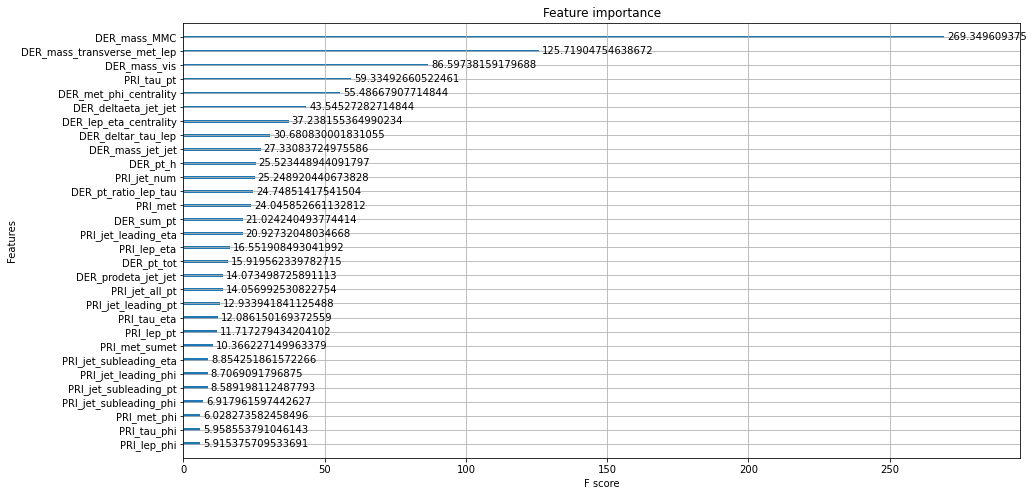

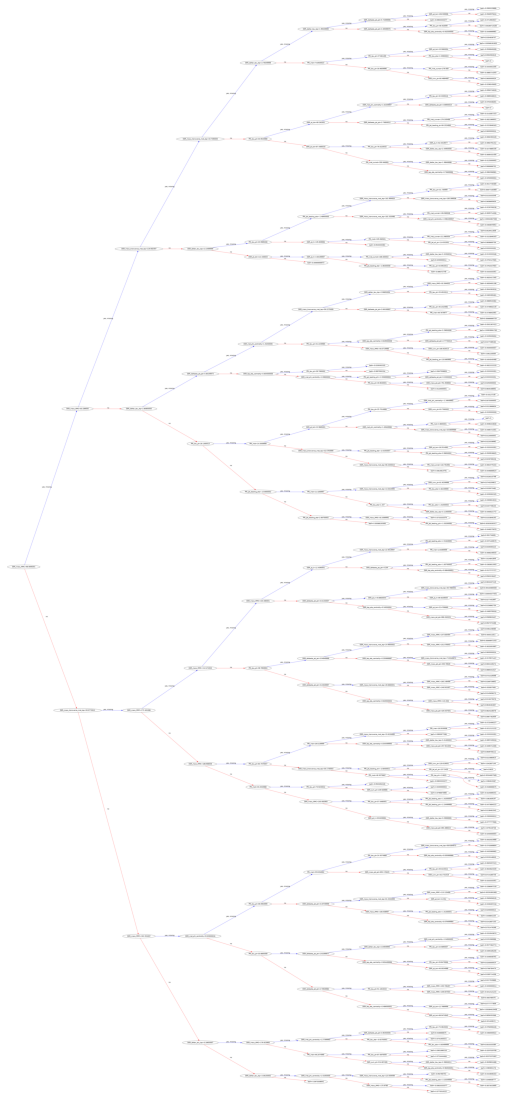

In [34]:
print('Feature Importances:')
print(model.feature_importances_)

import xgboost as xgb

feature_data = xgb.DMatrix(X_test)
model.get_booster().feature_names = feature_data.feature_names
model.get_booster().feature_types = feature_data.feature_types

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 8))
xgb.plot_importance(model, ax=ax, importance_type='gain')

!pip install graphviz

xgb.plot_tree(model, num_trees=0, rankdir='LR')

fig = plt.gcf()
fig.set_size_inches(10, 20)
plt.show()

### XGBoost

In [24]:
df['test_Weight'] = df['Weight'] * 550000 / len(y)

In [25]:
s = np.sum(df[df['Label']==1]['test_Weight'])
b = np.sum(df[df['Label']==0]['test_Weight'])

In [26]:
b/s

593.9401931492318

In [27]:
from xgboost import XGBClassifier

clf = XGBClassifier(n_estimators=120, learning_rate=0.1, missing=-999.0, 
                    scale_pos_weight=b/s)

clf.fit(X, y, sample_weight=df['test_Weight'], 
        eval_set=[(X, y)], eval_metric=['auc', 'ams@0.15'],
        sample_weight_eval_set=[df['test_Weight']])

#clf.save_model('higgs-sklearn.model')

[0]	validation_0-auc:0.91088	validation_0-ams@0.15:3.70349
[1]	validation_0-auc:0.91528	validation_0-ams@0.15:3.97016
[2]	validation_0-auc:0.91771	validation_0-ams@0.15:4.06973
[3]	validation_0-auc:0.91931	validation_0-ams@0.15:4.21078
[4]	validation_0-auc:0.92011	validation_0-ams@0.15:4.13576
[5]	validation_0-auc:0.92099	validation_0-ams@0.15:4.17622
[6]	validation_0-auc:0.92191	validation_0-ams@0.15:4.26380
[7]	validation_0-auc:0.92231	validation_0-ams@0.15:4.26293
[8]	validation_0-auc:0.92330	validation_0-ams@0.15:4.32536
[9]	validation_0-auc:0.92415	validation_0-ams@0.15:4.38135
[10]	validation_0-auc:0.92470	validation_0-ams@0.15:4.39102
[11]	validation_0-auc:0.92528	validation_0-ams@0.15:4.40832
[12]	validation_0-auc:0.92589	validation_0-ams@0.15:4.44617
[13]	validation_0-auc:0.92630	validation_0-ams@0.15:4.44726
[14]	validation_0-auc:0.92692	validation_0-ams@0.15:4.48756
[15]	validation_0-auc:0.92739	validation_0-ams@0.15:4.51991
[16]	validation_0-auc:0.92804	validation_0-ams@0.1

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=-999.0,
              monotone_constraints='()', n_estimators=120, n_jobs=16,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=593.9401931492318,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [28]:
clf.evals_result()

{'validation_0': OrderedDict([('auc',
               [0.910879,
                0.915277,
                0.917712,
                0.919314,
                0.920109,
                0.920992,
                0.921914,
                0.922306,
                0.923298,
                0.924153,
                0.924703,
                0.925281,
                0.925889,
                0.926301,
                0.926918,
                0.927393,
                0.928042,
                0.928428,
                0.928996,
                0.929478,
                0.929999,
                0.930363,
                0.93069,
                0.931093,
                0.931384,
                0.931678,
                0.932015,
                0.932341,
                0.932681,
                0.933036,
                0.933275,
                0.93359,
                0.933943,
                0.934161,
                0.934456,
                0.934762,
                0.935109,
  

In [29]:
clf.score(X, y)

0.800476